In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [5]:
df.shape

(301355, 5)

Проверяем формат столбцов

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [4]:
df.describe()

,Склад,Количество
count,301355.000000,301355.000000
mean,2.900652,2.951559
std,1.352221,2.998154
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,200.000000


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [10]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


Нарисуйте график продаж у `grouped_df`

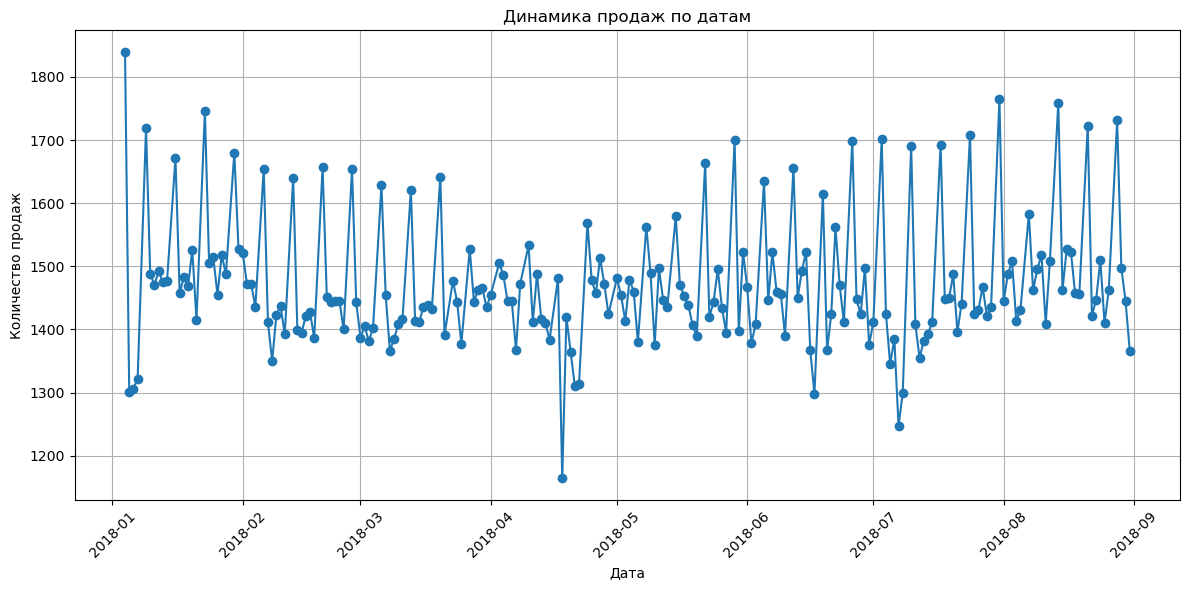

In [12]:
plt.figure(figsize=(12, 6))  # Размер графика
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o')

plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)  # Повернем даты для читаемости
plt.tight_layout()  # Автоматически подгонит размеры

plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

### Наблюдения по графику:
Общий тренд:

На протяжении всего периода график неровный, с сильными колебаниями, но постепенно количество продаж растёт — особенно видно ближе к июлю–августу.

Значит, продажи постепенно увеличиваются со временем (возможно, сезонный рост или раскрутка бизнеса).

Колебания и пики:

Почти каждый день есть высокие и низкие значения — это говорит о том, что продажи нестабильны, возможно, зависят от дня недели или внешних факторов.

Видны резкие падения, например, в начале апреля и в конце мая — возможно, это праздники, выходные, сбои в работе, отсутствие поставок и т.д.

Есть отдельные сильные пики, где продажи достигают более 1800 — это могут быть акции, распродажи или выход нового продукта.


Периодичность:

График выглядит зубчатым, что может говорить о недельной цикличности — например, в выходные меньше заказов, в будни — больше.


💡 Возможные выводы:
Бизнес развивается, продажи постепенно увеличиваются.

Есть явная нестабильность — возможно, стоит проверить влияние дней недели, месяцев или событий на продажи.

Резкие падения — сигнал к тому, чтобы проверить: праздники, сбои, сезонность?

Рост к августу — вероятно, усиление маркетинга или начало нового сезона.

#### Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
# 1. Квартильные значения
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# 2. Условия выброса
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Фильтрация выбросов
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# 4. Найдём строку с максимальным значением среди выбросов
max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]

# 5. Выведем строку с максимальным выбросом
print("Строка с максимальным выбросом по количеству продаж:")
max_outlier


Строка с максимальным выбросом по количеству продаж:


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


#### Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [16]:
# Убедимся, что дата в формате datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Фильтрация по:
filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &     # июнь, июль, август
    (df['Дата'].dt.weekday == 2) &              # среда (0-пн, 1-вт, 2-ср...)
    (df['Склад'] == 3)                          # склад №3
]

# Группируем по товару и считаем общее количество
top_product = (
    filtered
    .groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values(by='Количество', ascending=False)
    .head(1)  # берём топ-1
)

# Вывод
print("Топовый товар по продажам по средам за июнь-июль-август на складе №3:")
top_product


Топовый товар по продажам по средам за июнь-июль-август на складе №3:


,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [119]:

weather_df = pd.read_csv(
    "astana_weather.csv",
    sep=";",
    encoding="utf-8",
    skiprows=6,
    index_col=False  #не использовать колонку как индекс
)


# Проверим, как выглядит таблица
weather_df.head()


,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3.0,12.0,NaN,NaN,NaN,NaN


In [120]:
print(weather_df.columns)

Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')


In [121]:
weather_df.rename(columns={
    'Местное время в Астане': 'Дата',
    'T': 'Температура'
}, inplace=True)


In [122]:
print("Ошибок в датах:", weather_df['Дата'].isna().sum())
print("Диапазон дат:", weather_df['Дата'].min(), "→", weather_df['Дата'].max())


Ошибок в датах: 0
Диапазон дат: 01.06.2018 02:00 → 31.08.2018 23:00


In [126]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], errors='coerce')

In [127]:
# Группировка по дате без времени
daily_weather = (
    weather_df.groupby(weather_df['Дата'].dt.date)['Температура']
    .mean()
    .reset_index()
)

# Преобразуем обратно в datetime для удобства
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])
daily_weather.rename(columns={'Температура': 'T'}, inplace=True)


In [128]:
daily_weather.head()

,Дата,T
0,2018-06-01,19.975
1,2018-06-02,14.850
2,2018-06-03,9.525
3,2018-06-04,14.475
4,2018-06-05,20.900


In [129]:
print(weather_df['Дата'].dtype)

datetime64[ns]


In [131]:
print(grouped_df['Дата'].dtype)

datetime64[ns]


In [132]:
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='inner')

In [133]:
merged_df

,Дата,Количество продаж,T
0,2018-06-01,1467,19.9750
1,2018-06-02,1378,14.8500
2,2018-06-03,1408,9.5250
3,2018-06-05,1635,20.9000
4,2018-06-06,1446,24.5375
...,...,...,...
74,2018-08-26,1462,11.9750
75,2018-08-28,1731,14.1125
76,2018-08-29,1497,13.8250
77,2018-08-30,1445,14.1750


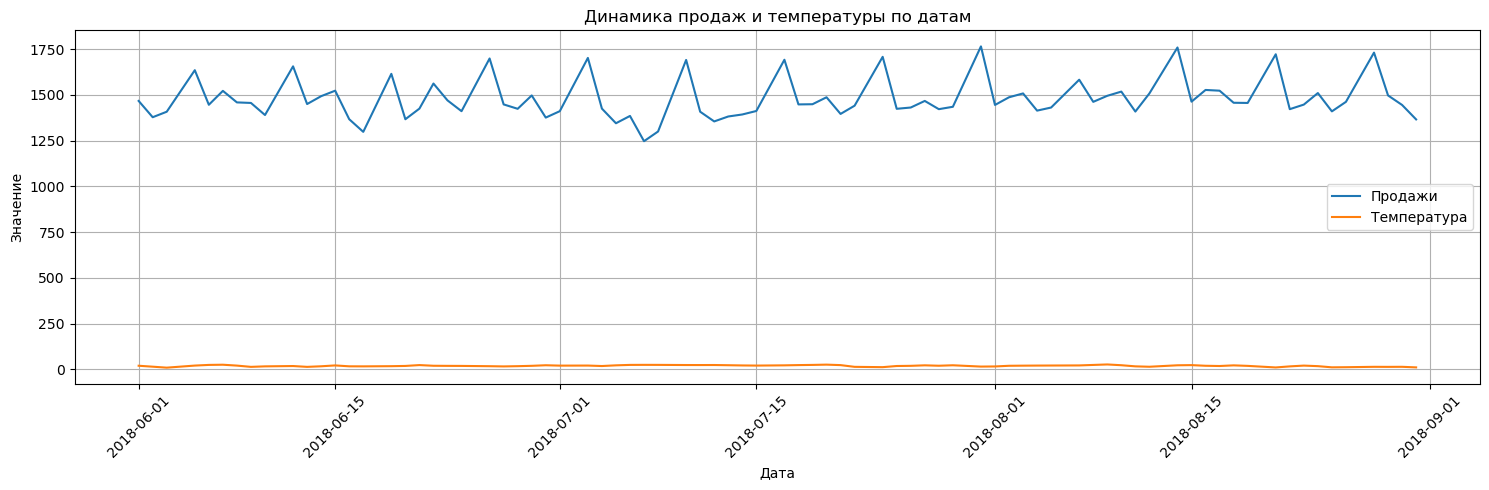

In [134]:
plt.figure(figsize=(15, 5))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Продажи')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура')
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Динамика продаж и температуры по датам")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

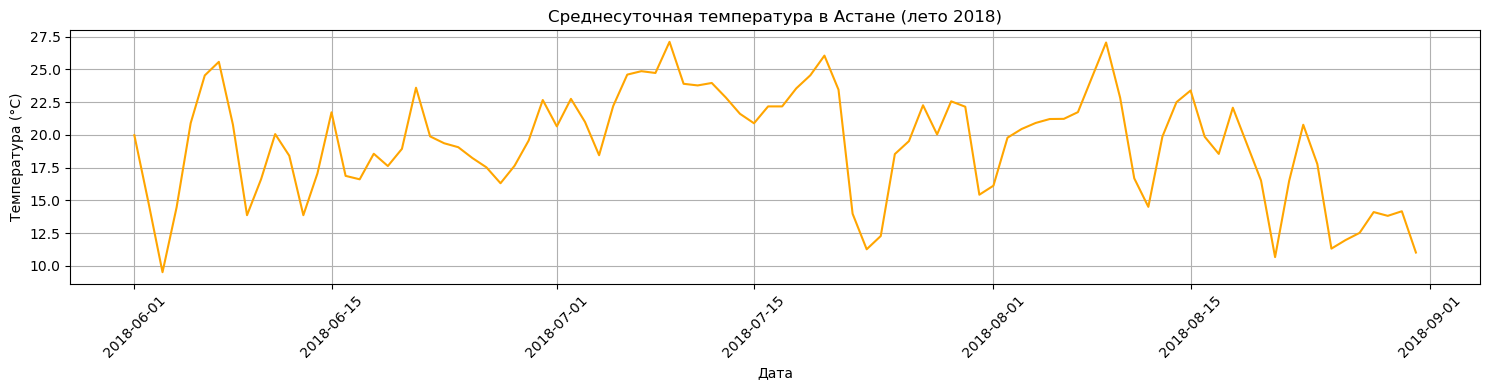

In [135]:
plt.figure(figsize=(15, 4))
plt.plot(daily_weather['Дата'], daily_weather['T'], color='orange')
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Среднесуточная температура в Астане (лето 2018)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()